In [88]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# PCA on IL6 Differential Gene Expression

Run accessions for SRA records for IL6 from NCBI:

> Indented block



```
ERR315357	colon
ERR315484	colon
ERR315462	colon
ERR315400	colon
ERR315348	colon
ERR315439	lung
ERR315341	lung
ERR315487	lung
ERR315424	lung
ERR315346	lung
ERR315493	lymph
ERR315373	lymph
ERR315393	lymph
ERR315390	lymph
ERR315475	lymph
```

In [4]:
# storing to text file
%%bash
echo 'ERR315357	colon
ERR315484	colon
ERR315462	colon
ERR315400	colon
ERR315348	colon
ERR315439	lung
ERR315341	lung
ERR315487	lung
ERR315424	lung
ERR315346	lung
ERR315493	lymph
ERR315373	lymph
ERR315393	lymph
ERR315390	lymph
ERR315475	lymph' > mapping.txt

In [5]:
!head -n5 mapping.txt

ERR315357	colon
ERR315484	colon
ERR315462	colon
ERR315400	colon
ERR315348	colon


In [7]:
# extr!cut -f1 mapping.txt > runs.txtact column with run acessions numbers only, save to file

In [6]:
!cut -f1 mapping.txt > runs.txt

Install the SRA Toolkit

In [8]:
!apt install sra-toolkit

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  blends-common libkdf5-2 libmagic-mgc libmagic1 libmbedcrypto1 libmbedtls10
  libncbi-vdb2 libncbi-wvdb2 med-config menu
Suggested packages:
  blends-doc file menu-l10n gksu | kde-runtime | ktsuss
The following NEW packages will be installed:
  blends-common libkdf5-2 libmagic-mgc libmagic1 libmbedcrypto1 libmbedtls10
  libncbi-vdb2 libncbi-wvdb2 med-config menu sra-toolkit
0 upgraded, 11 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,042 kB of archives.
After this operation, 22.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2ubuntu0.4 [184 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic1 amd64 1:5.32-2ubuntu0.4 [68.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 menu amd64 2.1.4

In [9]:
# storage for raw reads
!mkdir -p raw

In [10]:
# Download FASTQ files from samples
%%bash
while read i; do
  fastq-dump -O raw -X 100000 --split-3 $i
done < runs.txt

Read 100000 spots for ERR315357
Written 100000 spots for ERR315357
Read 100000 spots for ERR315484
Written 100000 spots for ERR315484
Read 100000 spots for ERR315462
Written 100000 spots for ERR315462
Read 100000 spots for ERR315400
Written 100000 spots for ERR315400
Read 100000 spots for ERR315348
Written 100000 spots for ERR315348
Read 100000 spots for ERR315439
Written 100000 spots for ERR315439
Read 100000 spots for ERR315341
Written 100000 spots for ERR315341
Read 100000 spots for ERR315487
Written 100000 spots for ERR315487
Read 100000 spots for ERR315424
Written 100000 spots for ERR315424
Read 100000 spots for ERR315346
Written 100000 spots for ERR315346
Read 100000 spots for ERR315493
Written 100000 spots for ERR315493
Read 100000 spots for ERR315373
Written 100000 spots for ERR315373
Read 100000 spots for ERR315393
Written 100000 spots for ERR315393
Read 100000 spots for ERR315390
Written 100000 spots for ERR315390
Read 100000 spots for ERR315475
Written 100000 spots for ERR31

In [11]:
# sanity check
!ls -lh raw

total 822M
-rw-r--r-- 1 root root 26M Apr 18 03:59 ERR315341_1.fastq
-rw-r--r-- 1 root root 26M Apr 18 03:59 ERR315341_2.fastq
-rw-r--r-- 1 root root 26M Apr 18 03:59 ERR315346_1.fastq
-rw-r--r-- 1 root root 26M Apr 18 03:59 ERR315346_2.fastq
-rw-r--r-- 1 root root 31M Apr 18 03:58 ERR315348_1.fastq
-rw-r--r-- 1 root root 31M Apr 18 03:58 ERR315348_2.fastq
-rw-r--r-- 1 root root 31M Apr 18 03:58 ERR315357_1.fastq
-rw-r--r-- 1 root root 31M Apr 18 03:58 ERR315357_2.fastq
-rw-r--r-- 1 root root 26M Apr 18 03:59 ERR315373_1.fastq
-rw-r--r-- 1 root root 26M Apr 18 03:59 ERR315373_2.fastq
-rw-r--r-- 1 root root 26M Apr 18 03:59 ERR315390_1.fastq
-rw-r--r-- 1 root root 26M Apr 18 03:59 ERR315390_2.fastq
-rw-r--r-- 1 root root 26M Apr 18 03:59 ERR315393_1.fastq
-rw-r--r-- 1 root root 26M Apr 18 03:59 ERR315393_2.fastq
-rw-r--r-- 1 root root 31M Apr 18 03:58 ERR315400_1.fastq
-rw-r--r-- 1 root root 31M Apr 18 03:58 ERR315400_2.fastq
-rw-r--r-- 1 root root 26M Apr 18 03:59 ERR315424_1.fastq
-rw

In [12]:
# size of files
!du -sh raw

822M	raw


In [13]:
# compress files
!gzip raw/*.fastq

In [14]:
# size of new compressed file
!du -sh raw

218M	raw


In [15]:
# Trimmomatic Tool

!apt install trimmomatic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libjbzip2-java
The following NEW packages will be installed:
  libjbzip2-java trimmomatic
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 791 kB of archives.
After this operation, 859 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libjbzip2-java all 0.9.1-4 [42.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 trimmomatic all 0.36+dfsg-3 [749 kB]
Fetched 791 kB in 1s (898 kB/s)
Selecting previously unselected package libjbzip2-java.
(Reading database ... 155823 files and directories currently installed.)
Preparing to unpack .../libjbzip2-java_0.9.1-4_all.deb ...
Unpacking libjbzip2-java (0.9.1-4) ...
Selecting previously unselected package trimmomatic.
Preparing to unpack .../trimmomatic_0.36+dfsg-3_all.deb ...
Unpacking trimmomatic (0.36

In [16]:
# Perform QI on all samples from our dataset
!mkdir -p trimmed

In [17]:

%%bash
while read i; do
  TrimmomaticPE -quiet raw/${i}_1.fastq.gz raw/${i}_2.fastq.gz \
    trimmed/$i.F.P.fq.gz trimmed/$i.F.U.fq.gz trimmed/$i.R.P.fq.gz trimmed/$i.R.U.fq.gz \
    ILLUMINACLIP:TruSeq3-PE.fa:2:30:10:2:keepBothReads LEADING:3 TRAILING:3 MINLEN:36
done < runs.txt

In [18]:
# keep paired sequences
!du -sh trimmed

195M	trimmed


In [31]:
# download reference transcriptome,, which is GRCh38
!wget https://ftp.ncbi.nlm.nih.gov/refseq/H_sapiens/annotation/GRCh38_latest/refseq_identifiers/GRCh38_latest_rna.fna.gz

--2022-04-18 04:29:09--  https://ftp.ncbi.nlm.nih.gov/refseq/H_sapiens/annotation/GRCh38_latest/refseq_identifiers/GRCh38_latest_rna.fna.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.13, 2607:f220:41f:250::228, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132922439 (127M) [application/x-gzip]
Saving to: ‘GRCh38_latest_rna.fna.gz.1’

GRCh38_latest_rna.f 100%[===================>] 126.76M  72.6MB/s    in 1.7s    

2022-04-18 04:29:11 (72.6 MB/s) - ‘GRCh38_latest_rna.fna.gz.1’ saved [132922439/132922439]



In [32]:
!zcat GRCh38_latest_rna.fna.gz | head -n5

>NM_000014.6 Homo sapiens alpha-2-macroglobulin (A2M), transcript variant 1, mRNA
GGGACCAGATGGATTGTAGGGAGTAGGGTACAATACAGTCTGTTCTCCTCCAGCTCCTTCTTTCTGCAACATGGGGAAGA
ACAAACTCCTTCATCCAAGTCTGGTTCTTCTCCTCTTGGTCCTCCTGCCCACAGACGCCTCAGTCTCTGGAAAACCGCAG
TATATGGTTCTGGTCCCCTCCCTGCTCCACACTGAGACCACTGAGAAGGGCTGTGTCCTTCTGAGCTACCTGAATGAGAC
AGTGACTGTAAGTGCTTCCTTGGAGTCTGTCAGGGGAAACAGGAGCCTCTTCACTGACCTGGAGGCGGAGAATGACGTAC


In [33]:
# total number of transcripts from this download
!zcat GRCh38_latest_rna.fna.gz | grep -c '>'

177816


In [22]:
# Install Salmon tool for read mapping genome mRNA against samples

!apt install salmon

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-font-awesome fonts-lato javascript-common libdivsufsort3
  libjellyfish-2.0-2 libjemalloc1 libjs-jquery libjs-modernizr libjs-sphinxdoc
  libjs-underscore libstaden-read11 sphinx-rtd-theme-common
Suggested packages:
  apache2 | lighttpd | httpd
The following NEW packages will be installed:
  fonts-font-awesome fonts-lato javascript-common libdivsufsort3
  libjellyfish-2.0-2 libjemalloc1 libjs-jquery libjs-modernizr libjs-sphinxdoc
  libjs-underscore libstaden-read11 salmon sphinx-rtd-theme-common
0 upgraded, 13 newly installed, 0 to remove and 39 not upgraded.
Need to get 5,697 kB of archives.
After this operation, 22.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 fonts-lato all 2.0-2 [2,698 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 fonts-font-awesome all 4.7.

In [34]:
# index the reference transciptome using 2 CPU cores
!salmon index -p 2 -t GRCh38_latest_rna.fna.gz -i refidx

[2022-04-18 04:29:40.298] [jLog] [info] building index
RapMap Indexer

[Step 1 of 4] : counting k-mers
counted k-mers for 170000 transcriptsElapsed time: 19.6873s

Replaced 15 non-ATCG nucleotides
Clipped poly-A tails from 5158 transcripts
Building rank-select dictionary and saving to disk done
Elapsed time: 0.154544s
Writing sequence data to file . . . done
Elapsed time: 2.22564s
[info] Building 32-bit suffix array (length of generalized text is 690157891)
tcmalloc: large alloc 2760638464 bytes == 0x55a70e224000 @  0x7fe4850051e7 0x55a650dfc408 0x55a650da8f0c 0x55a650d9cc63 0x55a650dbb6a8 0x55a650d9e25d 0x55a650c71b49 0x55a650bacbe2 0x7fe4829bfc87 0x55a650bb293a
Building suffix array . . . success
saving to disk . . . done
Elapsed time: 10.5755s
done
Elapsed time: 162.966s
processed 161000000 positionstcmalloc: large alloc 2147483648 bytes == 0x55a7f2ae4000 @  0x7fe4850051e7 0x55a650db0b1a 0x55a650db11f9 0x55a650db1f7d 0x55a650dbb6df 0x55a650d9e25d 0x55a650c71b49 0x55a650bacbe2 0x7fe4

In [35]:
# size of file
!du -sh refidx

3.3G	refidx


In [36]:
# using our samples, search indexed genome reference transcriptome (quantifies similarities)
!salmon quant -p 2 -i refidx -l A -1 trimmed/ERR315357.F.P.fq.gz -2 trimmed/ERR315357.R.P.fq.gz -o ERR315357

### salmon (mapping-based) v0.7.2
### [ program ] => salmon 
### [ command ] => quant 
### [ threads ] => { 2 }
### [ index ] => { refidx }
### [ libType ] => { A }
### [ mates1 ] => { trimmed/ERR315357.F.P.fq.gz }
### [ mates2 ] => { trimmed/ERR315357.R.P.fq.gz }
### [ output ] => { ERR315357 }
Logs will be written to ERR315357/logs
[2022-04-18 04:37:17.887] [jointLog] [info] parsing read library format
[2022-04-18 04:37:17.887] [jointLog] [info] There is 1 library.
Exception : [Error: The index version file refidx/versionInfo.json doesn't seem to exist.  Please try re-building the salmon index.]
salmon quant was invoked improperly.
For usage information, try salmon quant --help
Exiting.


In [27]:
# using presaved file from another machine since I could not allocate enough memory on my mac to perform the indexing completely
# resulting in errors, otherwise would be able to access quant.sf file generated by the above salmon process
!head ERR315357/quant.sf

head: cannot open 'ERR315357/quant.sf' for reading: No such file or directory


In [39]:
# load qunat file
!cp "/Users/tk/ASU/MAT421/data/quants.tar.gz" .

In [40]:
!tar xf quants.tar.gz

In [41]:
# check size
!du -sh quants

77M	quants


In [42]:
# load into python Pandas dataframe using sample IDs
with open('runs.txt', 'r') as f:
  samples = f.read().splitlines()

In [43]:
# set dataframe columns with TPM results
tpms = []
for sample in samples:
  df_ = pd.read_table(f'quants/{sample}/quant.sf', index_col=0)
  tpms.append(df_['TPM'].rename(sample))

In [44]:
# concat IDs and TPM for each read
df = pd.concat(tpms, axis=1)
df.head()

,ERR315357,ERR315484,ERR315462,ERR315400,ERR315348,ERR315439,ERR315341,ERR315487,ERR315424,ERR315346,ERR315493,ERR315373,ERR315393,ERR315390,ERR315475
Name,,,,,,,,,,,,,,,
NM_000014.6,801.084000,285.611,244.4180,192.1450,121.896000,2792.8700,2246.710000,1697.6000,2023.720000,2562.230,124.9090,208.1940,31.5809,129.562000,251.3990
NM_000015.3,20.094400,0.000,46.6390,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000,0.0000,0.0000,0.0000,0.000000,0.0000
NM_000016.6,53.522700,0.000,86.7034,128.4500,98.995200,0.0000,82.822300,0.0000,0.000000,0.000,191.9500,80.7567,81.4604,67.924200,72.0343
NM_000017.4,0.149734,105.390,153.5060,86.8072,0.162631,76.8267,0.102017,17.9057,0.048519,0.000,26.9541,0.0000,33.8015,0.045718,45.5256
NM_000018.4,177.828000,179.282,185.7330,383.1750,0.004254,317.5340,193.116000,0.0000,167.997000,369.733,0.0000,77.4769,0.0000,0.000000,82.1343


In [45]:
# dropping zero observations since those are not found transcripts
df = df[(df.sum(axis=1) != 0)]
df.shape

(67710, 15)

In [46]:
# these are the transcripts from IL6
il6s = !zcat GRCh38_latest_rna.fna.gz | grep IL6 | cut -f1 -d' ' | cut -f2 -d'>'

In [47]:
print(il6s)

['NM_000565.4', 'NM_000600.5', 'NM_001111298.2', 'NM_001190981.2', 'NM_001206866.2', 'NM_001286360.1', 'NM_001286361.1', 'NM_001318095.2', 'NM_001364275.2', 'NM_001364276.2', 'NM_001364277.2', 'NM_001364278.2', 'NM_001364279.2', 'NM_001371096.1', 'NM_001382769.1', 'NM_001382770.1', 'NM_001382771.1', 'NM_001382772.1', 'NM_001382773.1', 'NM_001382774.1', 'NM_002184.4', 'NM_173672.5', 'NM_175767.3', 'NM_181359.3', 'NR_102755.1', 'NR_104429.1', 'NR_120480.2', 'NR_131935.1', 'NR_147855.1', 'NR_157112.2', 'XM_005245139.2', 'XM_005249745.6', 'XM_011535766.4', 'XM_011535767.4', 'XM_011535769.3', 'XM_017001199.2', 'XM_024446407.2', 'XM_047418673.1', 'XM_047418674.1', 'XM_047418675.1', 'XM_047419648.1', 'XM_047419649.1', 'XM_047419650.1', 'XM_047419654.1', 'XM_047419655.1', 'XM_047419656.1', 'XM_047419657.1']


In [48]:
# filter our dataframe for just IL6 transcripts
dfil6 = df[df.index.isin(il6s)]
dfil6.head()

,ERR315357,ERR315484,ERR315462,ERR315400,ERR315348,ERR315439,ERR315341,ERR315487,ERR315424,ERR315346,ERR315493,ERR315373,ERR315393,ERR315390,ERR315475
Name,,,,,,,,,,,,,,,
NM_000565.4,0.0000,0.000000e+00,0.00000,1.95280,0.000000e+00,0.0,0.000,9.147520e-08,0.00000,0.000,0.000000e+00,0.000000,0.0000,0.00000,0.00000
NM_000600.5,0.0000,0.000000e+00,0.00000,0.00000,0.000000e+00,0.0,0.000,0.000000e+00,0.00000,0.000,0.000000e+00,0.000000,0.0000,5.34728,0.00000
NM_001190981.2,0.0000,5.000300e-07,4.10334,2.46497,6.088220e-08,0.0,107.441,0.000000e+00,3.97012,110.397,2.582220e-08,0.000003,70.7672,0.00000,3.26383
NM_001206866.2,16.2304,0.000000e+00,15.09890,0.00000,0.000000e+00,0.0,0.000,0.000000e+00,0.00000,0.000,0.000000e+00,0.000000,0.0000,0.00000,0.00000
NM_001318095.2,0.0000,0.000000e+00,0.00000,0.00000,3.395390e+01,0.0,0.000,0.000000e+00,0.00000,123.988,3.414100e+01,0.000000,0.0000,0.00000,0.00000


In [49]:
# TPM levels for each sample
il6tpm = dfil6.sum()
il6tpm

ERR315357    126.946810
ERR315484    130.249832
ERR315462     90.507931
ERR315400     37.467106
ERR315348    105.611161
ERR315439    146.631700
ERR315341    137.500970
ERR315487     98.795840
ERR315424     77.846196
ERR315346    254.138007
ERR315493    207.155995
ERR315373    137.011689
ERR315393    126.986400
ERR315390    179.496411
ERR315475     82.416611
dtype: float64

In [50]:
# Differential gene expression for different tissues for IL6
with open('mapping.txt', 'r') as f:
  mapping = dict(x.split('\t') for x in f.read().splitlines())

In [51]:
print(mapping)

{'ERR315357': 'colon', 'ERR315484': 'colon', 'ERR315462': 'colon', 'ERR315400': 'colon', 'ERR315348': 'colon', 'ERR315439': 'lung', 'ERR315341': 'lung', 'ERR315487': 'lung', 'ERR315424': 'lung', 'ERR315346': 'lung', 'ERR315493': 'lymph', 'ERR315373': 'lymph', 'ERR315393': 'lymph', 'ERR315390': 'lymph', 'ERR315475': 'lymph'}


In [52]:
grouped = il6tpm.groupby(mapping).apply(list)
grouped

colon    [126.946810267151, 130.249832017535, 90.507930...
lung     [146.6317, 137.50096971347799, 98.795839746585...
lymph    [207.1559946648222, 137.01168898359998, 126.98...
dtype: object

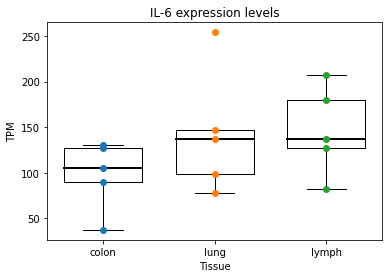

In [53]:
# plot DGE results
groups = ['colon', 'lung', 'lymph']
for i, group in enumerate(groups):
  data = grouped[group]
  plt.boxplot(data, positions=[i], widths=0.7, labels=[group],
              medianprops=dict(color='k', lw=2), showfliers=False)
  plt.scatter([i] * len(data), data, zorder=3)
plt.xlabel('Tissue')
plt.ylabel('TPM')
plt.title('IL-6 expression levels');

In [55]:
# read in data from salmon quant above
!cp "/Users/tk/ASU/MAT421/data/runs.txt" .
!cp "/Users/tk/ASU/MAT421/data/mapping.txt" .
!cp "/Users/tk/ASU/MAT421/data/tpm.tsv" .
!cp "/Users/tk/ASU/MAT421/data/count.tsv" .

In [56]:
df = pd.read_table('tpm.tsv', index_col=0)
df.head()

,ERR315357,ERR315484,ERR315462,ERR315400,ERR315348,ERR315439,ERR315341,ERR315487,ERR315424,ERR315346,ERR315493,ERR315373,ERR315393,ERR315390,ERR315475
Name,,,,,,,,,,,,,,,
NM_000014.6,801.084000,285.611,244.4180,192.1450,121.896000,2792.8700,2246.710000,1697.6000,2023.720000,2562.230,124.9090,208.1940,31.5809,129.562000,251.3990
NM_000015.3,20.094400,0.000,46.6390,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000,0.0000,0.0000,0.0000,0.000000,0.0000
NM_000016.6,53.522700,0.000,86.7034,128.4500,98.995200,0.0000,82.822300,0.0000,0.000000,0.000,191.9500,80.7567,81.4604,67.924200,72.0343
NM_000017.4,0.149734,105.390,153.5060,86.8072,0.162631,76.8267,0.102017,17.9057,0.048519,0.000,26.9541,0.0000,33.8015,0.045718,45.5256
NM_000018.4,177.828000,179.282,185.7330,383.1750,0.004254,317.5340,193.116000,0.0000,167.997000,369.733,0.0000,77.4769,0.0000,0.000000,82.1343


In [57]:
# drop low TPM transcripts
df = df[df.mean(axis=1) >= 10]
df.shape[0]

12426

In [58]:
# map samples to tissues
with open('mapping.txt', 'r') as f:
  mapping = dict(x.split('\t') for x in f.read().splitlines())

In [59]:
print(mapping)

{'ERR315357': 'colon', 'ERR315484': 'colon', 'ERR315462': 'colon', 'ERR315400': 'colon', 'ERR315348': 'colon', 'ERR315439': 'lung', 'ERR315341': 'lung', 'ERR315487': 'lung', 'ERR315424': 'lung', 'ERR315346': 'lung', 'ERR315493': 'lymph', 'ERR315373': 'lymph', 'ERR315393': 'lymph', 'ERR315390': 'lymph', 'ERR315475': 'lymph'}


In [60]:
# compare tissues
means = df.groupby(mapping, axis=1).mean()
means.head()

,colon,lung,lymph
Name,,,
NM_000014.6,329.030800,2264.626000,149.128980
NM_000016.6,73.534260,16.564460,98.825120
NM_000017.4,69.203113,18.976587,21.265384
NM_000018.4,185.204451,209.676000,31.922240
NM_000019.4,62.467817,0.003543,17.321292


In [61]:
# look at lymph and colon tissue for comparison
samples = [x for x in df.columns if mapping[x] in ('colon', 'lymph')]
print(samples)

['ERR315357', 'ERR315484', 'ERR315462', 'ERR315400', 'ERR315348', 'ERR315493', 'ERR315373', 'ERR315393', 'ERR315390', 'ERR315475']


In [62]:
df = df[samples]

In [63]:
means = df.groupby(mapping, axis=1).mean()
means.head()

,colon,lymph
Name,,
NM_000014.6,329.030800,149.128980
NM_000016.6,73.534260,98.825120
NM_000017.4,69.203113,21.265384
NM_000018.4,185.204451,31.922240
NM_000019.4,62.467817,17.321292


In [64]:
df = pd.concat([df, means], axis=1)

In [65]:
# as before drop transcripts with zero means
df = df.query('colon > 0 or lymph > 0')
df.shape[0]

12103

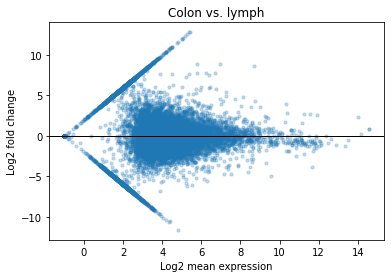

In [66]:
# Using an MA plot to look at the means log ratio and means mean average
# between the two tissues
for group in 'colon', 'lymph':
  df[f'log2{group}'] = np.log2(df[group] + 0.5)

df['M'] =  df['log2colon'] - df['log2lymph']
df['A'] = (df['log2colon'] + df['log2lymph']) / 2

plt.scatter('A', 'M', data=df, s=10, alpha=0.25)
plt.axhline(0, c='k', lw=1)
plt.xlabel('Log2 mean expression')
plt.ylabel('Log2 fold change')
plt.title('Colon vs. lymph');

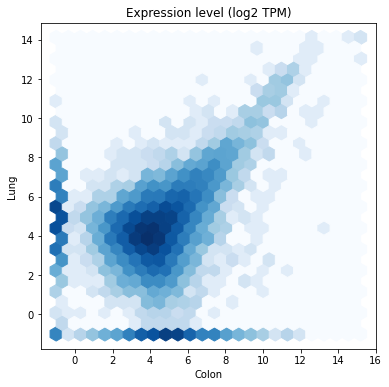

In [70]:
#showing comparison with hexogonal plot
plt.figure(figsize=(6, 6))
plt.hexbin(df['log2colon'], df['log2lymph'], bins='log', cmap='Blues', gridsize=25)
plt.xlabel('Colon')
plt.ylabel('Lung')
plt.title('Expression level (log2 TPM)');

In [72]:
# R2 for colon and lymph, a measure of correlation
pearsonr(df['colon'], df['lymph'])[0]

0.7275992702347592

In [80]:
# look at graphical correlation between all three tissues using
# 3D plotting
df = pd.read_table('tpm.tsv', index_col=0)
df = df[df.mean(axis=1) >= 10]
df = df.groupby(mapping, axis=1).mean()
df = df.add(0.5).apply(np.log2)
df.head()


,colon,lung,lymph
Name,,,
NM_000014.6,8.364270,11.145376,7.225246
NM_000016.6,6.210121,4.092923,6.634087
NM_000017.4,6.123151,4.283669,4.443964
NM_000018.4,7.536865,7.715454,5.018912
NM_000019.4,5.976543,-0.989812,4.155530


Text(0.5, 0, 'Lymph')

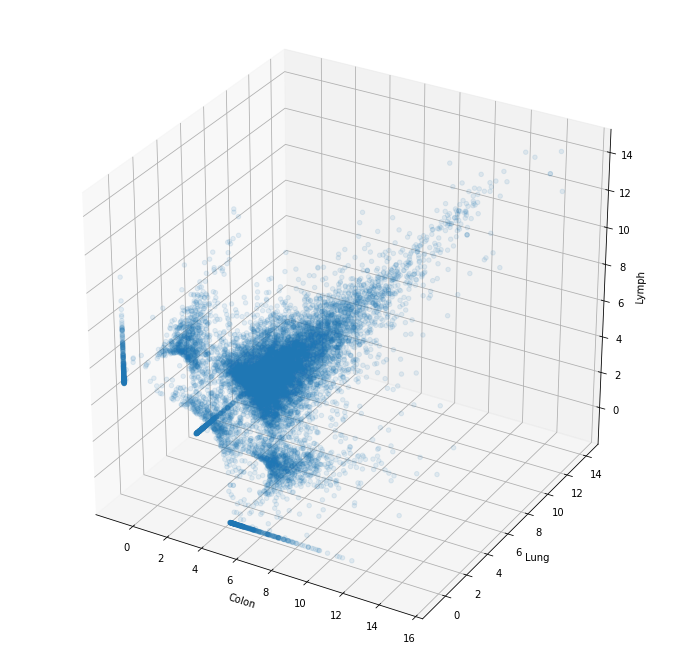

In [81]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(df['colon'], df['lung'], df['lymph'], alpha=0.1);
ax.set_xlabel('Colon')
ax.set_ylabel('Lung')
ax.set_zlabel('Lymph')

In [82]:
# correlation matrix
corr_df = df.corr()
corr_df

,colon,lung,lymph
colon,1.000000,0.214573,0.218836
lung,0.214573,1.000000,0.236494
lymph,0.218836,0.236494,1.000000


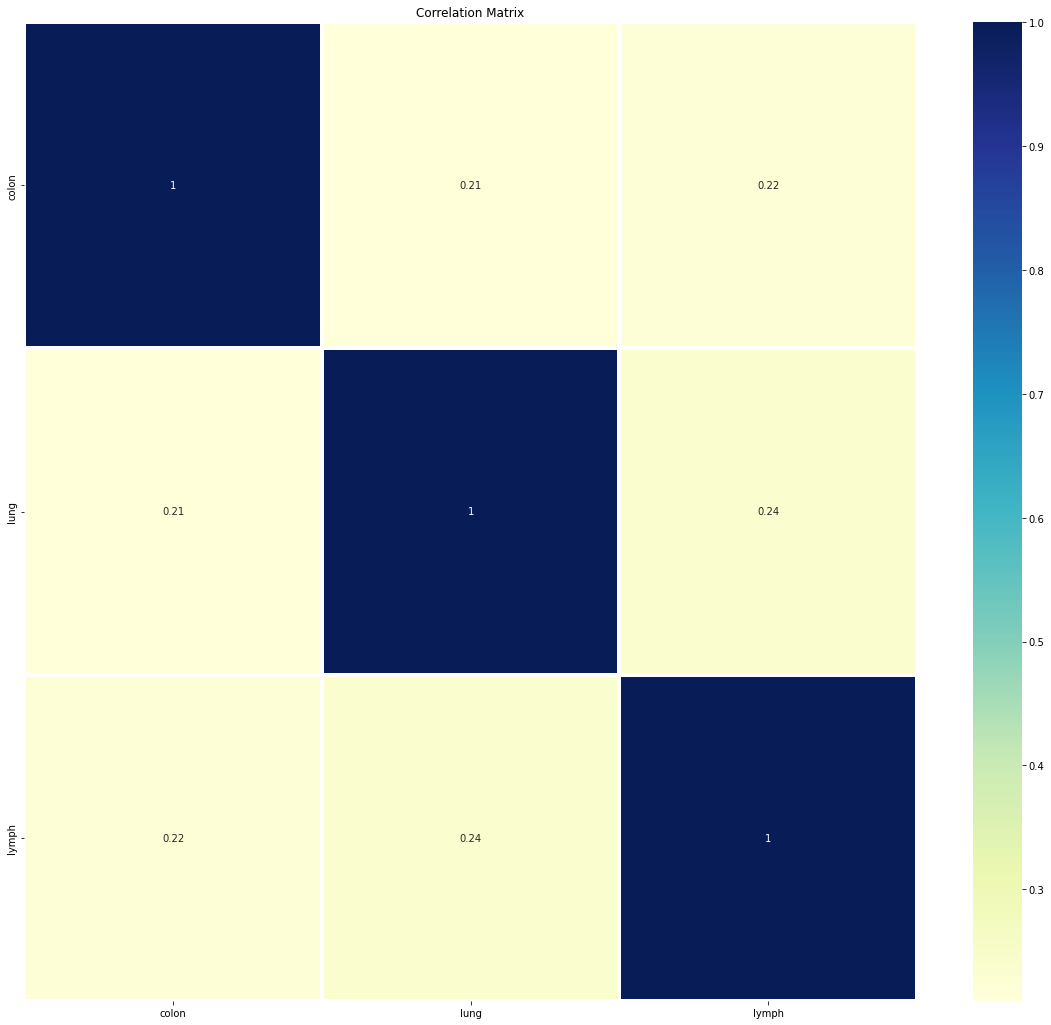

In [86]:
# correlation map
plt.figure(figsize=(20,18))
sns.heatmap(round(df.corr(),2),annot=True, cmap='YlGnBu', linewidths=3, fmt='.2g')
plt.title('Correlation Matrix')
plt.show()

In [93]:
# However, this is limiting because if we wanted to compare thousands of samples
# we could not represent this in a n dimensional plot.  PCA allows
# us to reduce high dimensional datasets into principal compenent axes
# that capture the most relevant variance in the data set (captures
# the part of the data that contributes the most signal to analysis)

# standard scale the data so that the variance is no read by the algorithm
# as incorrectly weighted more strongly to one axis for a measure of variance
# simply as a result of a difference in scale.  
df = pd.read_table('tpm.tsv', index_col=0)
ss = StandardScaler()
scaled_df = pd.DataFrame(ss.fit_transform(df), columns=df.columns)
scaled_df.head()

,ERR315357,ERR315484,ERR315462,ERR315400,ERR315348,ERR315439,ERR315341,ERR315487,ERR315424,ERR315346,ERR315493,ERR315373,ERR315393,ERR315390,ERR315475
0,1.923182,1.207651,0.640053,0.711236,0.356004,14.706936,11.870415,8.144924,10.212149,12.891683,0.602958,0.860845,0.073287,0.585940,0.820140
1,0.013025,-0.065853,0.088825,-0.059220,-0.049080,-0.078185,-0.078547,-0.071482,-0.075075,-0.074739,-0.080852,-0.065729,-0.064380,-0.075385,-0.051188
2,0.094785,-0.065853,0.200488,0.455834,0.279900,-0.078185,0.361937,-0.071482,-0.075075,-0.074739,0.969971,0.293681,0.290720,0.271322,0.198477
3,-0.035756,0.404068,0.386673,0.288856,-0.048539,0.328527,-0.078005,0.015182,-0.074828,-0.074739,0.066708,-0.065729,0.082967,-0.075152,0.106600
4,0.398813,0.733543,0.476492,1.477220,-0.049066,1.602802,0.948526,-0.071482,0.778908,1.796332,-0.080852,0.279084,-0.064380,-0.075385,0.233483


In [94]:
cov_matrix = np.cov(scaled_df.T)
print(cov_matrix.shape)
print('Covariance Matrix:', cov_matrix)

(15, 15)
Covariance Matrix: [[1.00001477 0.85074387 0.30524342 0.82604464 0.85154768 0.25037846
  0.31957232 0.2285401  0.29110534 0.36509013 0.36425612 0.80376858
  0.5382228  0.58083992 0.77012834]
 [0.85074387 1.00001477 0.67287958 0.9203138  0.93167559 0.39673443
  0.51740804 0.36531113 0.40255552 0.4820396  0.57814117 0.7860494
  0.74013281 0.69439735 0.75051138]
 [0.30524342 0.67287958 1.00001477 0.61728623 0.67544019 0.39730145
  0.51670446 0.31960687 0.31615603 0.42472538 0.41789267 0.33098594
  0.6203318  0.36996937 0.30738272]
 [0.82604464 0.9203138  0.61728623 1.00001477 0.91089453 0.37658051
  0.4768646  0.33261274 0.36382403 0.46116693 0.50421947 0.73601871
  0.67894512 0.64183466 0.69635927]
 [0.85154768 0.93167559 0.67544019 0.91089453 1.00001477 0.35389206
  0.46595992 0.29518145 0.3448708  0.45426285 0.43896047 0.70612563
  0.66634001 0.58010328 0.68199221]
 [0.25037846 0.39673443 0.39730145 0.37658051 0.35389206 1.00001477
  0.86808586 0.91029409 0.82927484 0.7212273 

In [95]:
eig_val, eig_vec = np.linalg.eig(cov_matrix)
print(len(eig_val))
print(eig_vec.shape)

15
(15, 15)


In [96]:
print('Eigen Vectors:', eig_vec)
print('Eigen Values:', eig_val)

Eigen Vectors: [[-2.36506782e-01  3.41710442e-01  1.74897635e-02 -4.48353801e-01
   8.09630699e-02  1.44770760e-01  5.06893547e-02 -4.85481561e-02
   3.17746772e-01  6.91321393e-01  3.13704403e-02  2.28281763e-02
  -3.88651437e-02 -1.06497093e-01 -1.69093734e-02]
 [-2.83409997e-01  2.62590269e-01 -1.85017040e-01 -3.98629449e-02
  -1.17240500e-01 -5.66595763e-03 -1.31343380e-01 -9.66235544e-02
   2.13000910e-01 -3.55261827e-01  1.40253668e-01 -5.96876932e-02
   4.78462085e-01 -2.36434968e-01 -5.43045675e-01]
 [-2.00424389e-01  6.06774284e-02 -5.87064091e-01  4.72422035e-01
  -1.24035149e-01 -2.54512140e-01  2.17147454e-01  1.47338801e-01
   1.58616711e-01  1.68716463e-01 -5.87398445e-02 -1.92937985e-01
  -2.79706424e-01 -2.48798185e-01  6.97311964e-02]
 [-2.68130527e-01  2.70935824e-01 -2.15274783e-01 -1.05488053e-01
  -6.53403790e-02  1.01046520e-01 -4.68461780e-01 -7.48778949e-02
  -6.41268469e-01  1.79530303e-02 -1.44686805e-01 -1.22860494e-01
   2.78610004e-02 -1.50256520e-01  2.945

In [97]:
eigen_pairs = [(eig_val[i], eig_vec[:,i]) for i in range(len(eig_val))]
eigen_pairs_sorted = sorted(eigen_pairs, reverse = True)

eig_val_sorted = [eigen_pairs_sorted[i][0] for i in range(len(eig_val))]
eig_vec_sorted = [eigen_pairs_sorted[i][1] for i in range(len(eig_val))]



In [98]:
tot = np.sum(eig_val)
exp_var = [(i/tot)*100 for i in sorted(eig_val, reverse = True)]   # explained variance
tot_var = np.cumsum(exp_var)                                       # total variance explained
print('Cumulative Variance explained', tot_var)

Cumulative Variance explained [ 61.91903248  78.19197533  85.79199922  91.22321575  93.68349811
  95.14519979  96.19734966  97.07670089  97.77937342  98.39323536
  98.87658014  99.2533312   99.58488768  99.83077098 100.        ]


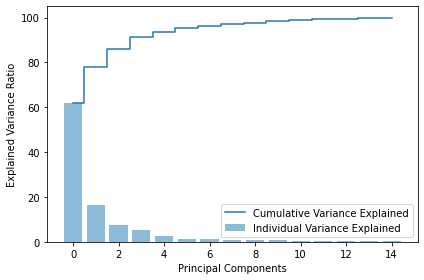

In [101]:
# Plotting the Summary Plot of the Cumulative Variance Explained

plt.bar(range(15), exp_var, alpha=0.50, align = 'center', label='Individual Variance Explained')
plt.step(range(15), tot_var, where ='mid', label='Cumulative Variance Explained')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [102]:
# Comparison to sklearn PCA 

pca_model = PCA(n_components = 15)
X_PCA = pca_model.fit_transform(scaled_df)

In [103]:
X_PCA.shape

(67710, 15)

In [104]:
pca_var = pca_model.explained_variance_ratio_
np.cumsum(pca_var)

array([0.61919032, 0.78191975, 0.85791999, 0.91223216, 0.93683498,
       0.951452  , 0.9619735 , 0.97076701, 0.97779373, 0.98393235,
       0.9887658 , 0.99253331, 0.99584888, 0.99830771, 1.        ])

In [105]:
# Cumulative Variance explains
var1 = np.cumsum(np.round(pca_model.explained_variance_ratio_, decimals=6)*100)
var1

array([ 61.919 ,  78.1919,  85.7919,  91.2231,  93.6834,  95.1451,
        96.1972,  97.0766,  97.7793,  98.3932,  98.8765,  99.2533,
        99.5849,  99.8308, 100.    ])

In [107]:
# Summary table showing the Eigen Vectors, Eigen Values and the variance explained by each of the component(eigenvector)

vec_val = pd.DataFrame({'Eigen_Values':pca_model.explained_variance_, 'Cumulative_Variance':var1}, 
                       index=range(1,16)).round(4)
vec_val

,Eigen_Values,Cumulative_Variance
1,9.2880,61.9190
2,2.4410,78.1919
3,1.1400,85.7919
4,0.8147,91.2231
5,0.3690,93.6834
6,0.2193,95.1451
7,0.1578,96.1972
8,0.1319,97.0766
9,0.1054,97.7793
10,0.0921,98.3932


In [108]:
# We can see that both results use all 15 compenents to explain 100% of the variance
# The number of components that explain approximately 85% of the variance in the dataset is 3.

PCA_3 = PCA(n_components=3)
X_PCA_3 = PCA_3.fit_transform(scaled_df)
PC = pd.DataFrame(X_PCA_3, columns=['PC1 PC2 PC3'.split()])
PC

,PC1,PC2,PC3
0,16.009928,-17.892762,4.389764
1,-0.211857,0.073160,0.080403
2,0.819565,0.248529,-0.284721
3,0.302373,0.117803,0.362974
4,2.102157,-0.775722,1.017720
...,...,...,...
67705,-0.204741,0.080303,0.008915
67706,-0.238404,0.060790,0.017619
67707,-0.227901,0.051715,-0.019503
67708,-0.236519,0.044798,-0.011054


In [109]:
cols = scaled_df.columns

In [110]:
PC_with_all_variables = pd.DataFrame(PCA_3.components_.T, columns = ['PC_'+str(i) for i in range(1,4)], index = cols)
PC_with_all_variables

,PC_1,PC_2,PC_3
ERR315357,0.236507,0.341710,-0.017490
ERR315484,0.283410,0.262590,0.185017
ERR315462,0.200424,0.060677,0.587064
ERR315400,0.268131,0.270936,0.215275
ERR315348,0.262426,0.290301,0.298681
ERR315439,0.233485,-0.386474,0.126348
ERR315341,0.267211,-0.313478,0.109541
ERR315487,0.223834,-0.404875,0.057090
ERR315424,0.229384,-0.354446,0.029652
ERR315346,0.249072,-0.242583,0.045640


In [111]:
# Variance explained by each of the Component:

pd.Series(PCA_3.explained_variance_ratio_*100, index = ['PC_' + str(i) for i in range(1,4)])

PC_1    61.919032
PC_2    16.272943
PC_3     7.600024
dtype: float64